In [1]:
import os, time, librosa, librosa.display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from tensorflow.keras import utils

import audio_data_loader as audioloader

In [2]:
source = audioloader.create_source_dataset(audioloader.root_path)

Data source array is prepared - 0.018045663833618164 c


#### Output data set:

0. full file name
1. modality
2. vocal chanel
3. emotion
4. emotional intensity
5. statement
6. repetitions
7. actor index
8. gender (1 - female, 0 - male)

In [3]:
def get_rms_features(y, sr):
    out = []
    
    out.append(np.min(librosa.feature.rms(y = y)))
    out.append(np.mean(librosa.feature.rms(y = y)))
    out.append(np.max(librosa.feature.rms(y = y)))

    return out

In [4]:
def get_dataset(source):
    
    m_train = []
    f_train = []
    
    for i, row in tqdm(source.iterrows()):
        
        try:
            
            # read the audio file
            y, sr = audioloader.read_audio(row[0])
            
            # append 
            if row[8] == 1:
                f_train.append(get_rms_features(y, sr))
            else:
                m_train.append(get_rms_features(y, sr))
            
        except:
            
            print(f'Invalid object index {i}')
            print(row)
        
        
    return np.array(f_train), np.array(m_train)

In [20]:
def show_diagram(x, y, title):
    
    fig, ax = plt.subplots(figsize = (20, 10))
    fig.tight_layout(pad = 3.0)
    
    ax.plot(x, color = 'blue', label = f'{title} - man')
    ax.plot(y, color = 'red', label = f'{title} - woman')
    
    plt.legend()
    plt.show()
    

In [5]:
f_train, m_train = get_dataset(source)

1440it [03:12,  7.47it/s]


In [7]:
print(f_train.shape)
print(m_train.shape)

(720, 3)
(720, 3)


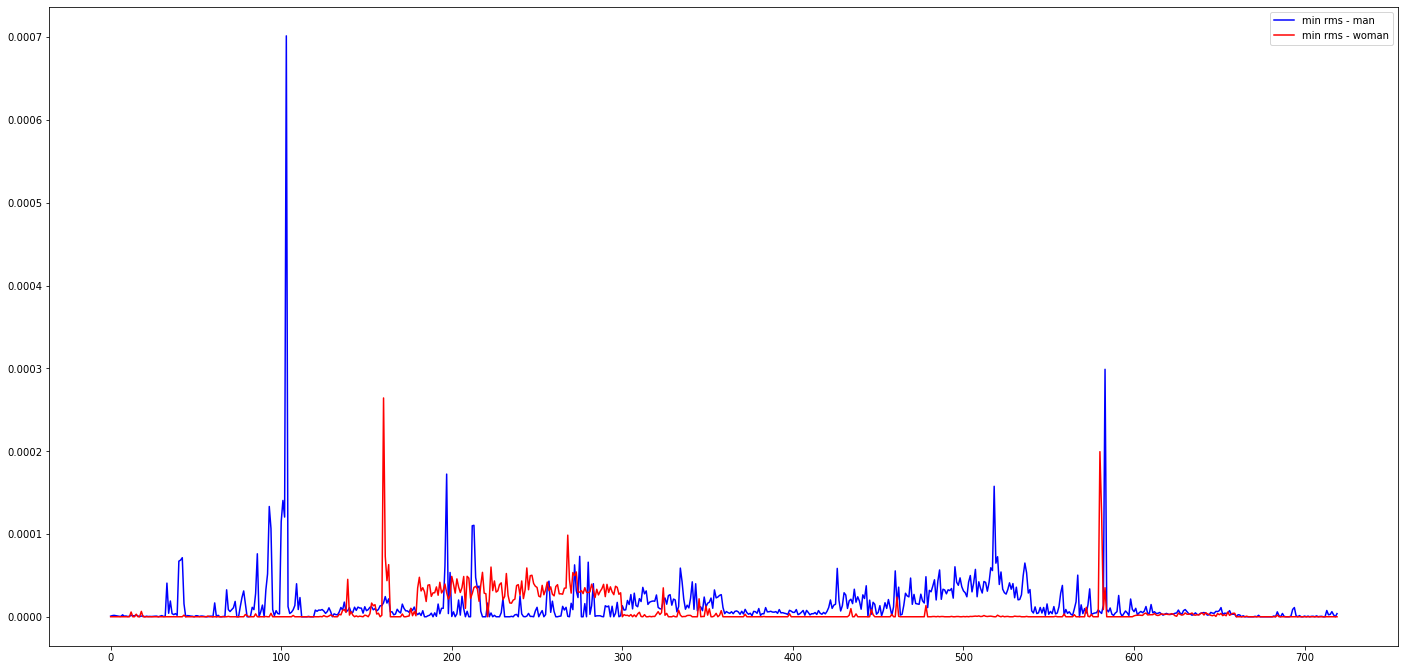

In [21]:
show_diagram(m_train[:, 0], f_train[:, 0], 'min rms')

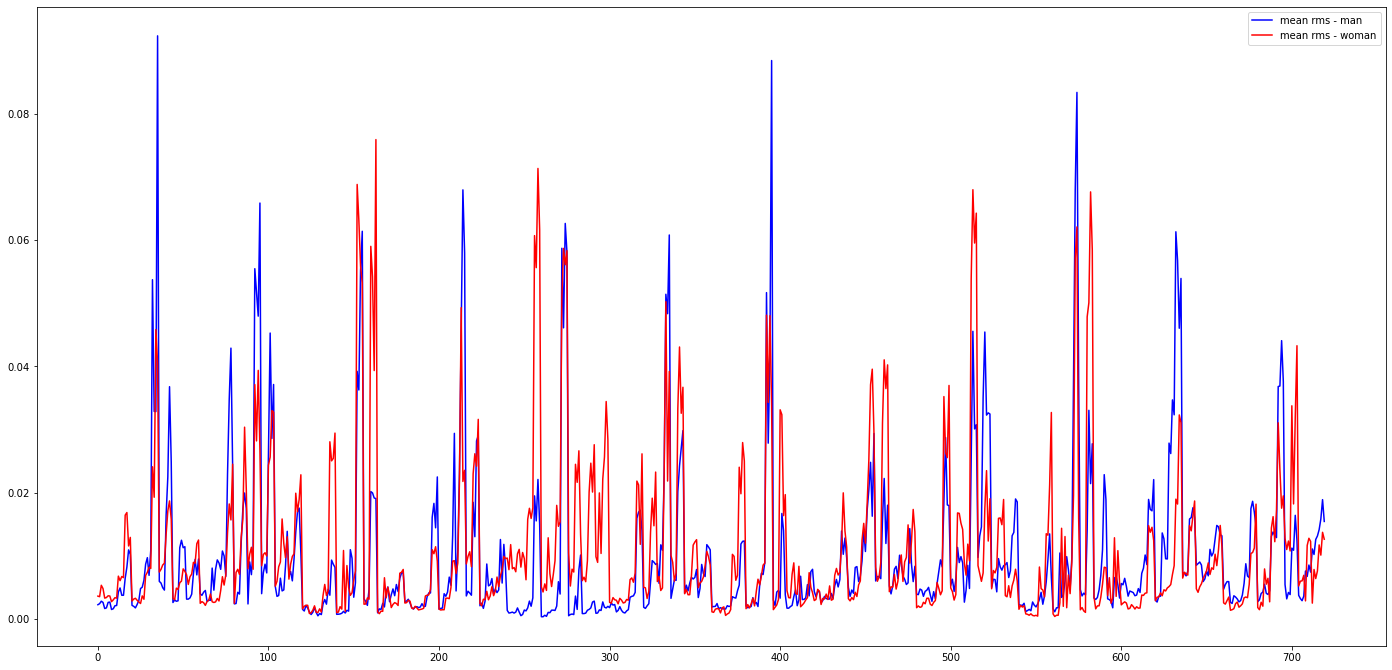

In [22]:
show_diagram(m_train[:, 1], f_train[:, 1], 'mean rms')

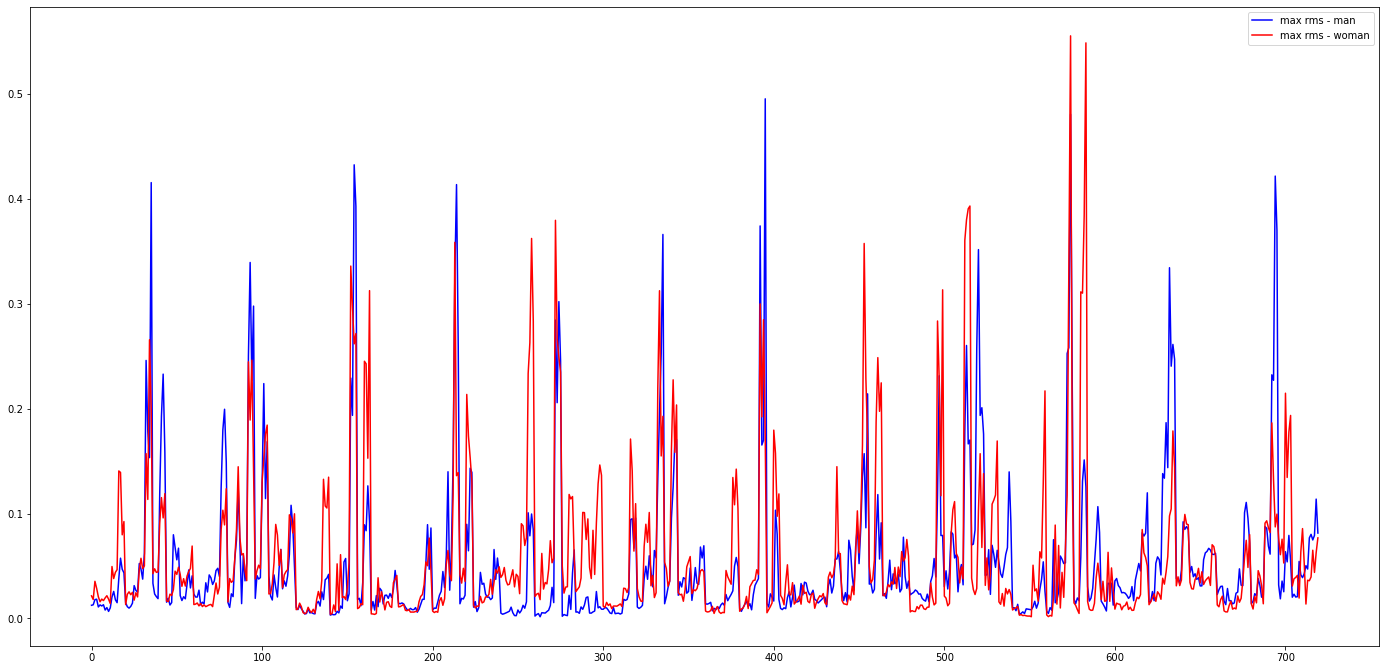

In [23]:
show_diagram(m_train[:, 2], f_train[:, 2], 'max rms')